<a href="https://colab.research.google.com/github/dgiri4132/CAPM-Portfolio-Analysis/blob/main/CAPM_vs_Actual_Return_myPort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
tickers=[]
n=int(input('Enter how many stocks you want: '))
for i in range(n):
  symbol=input(f'Enter the symbol:{i+1} ').upper().strip()
  tickers.append(symbol)
tickers.append('^GSPC')
start_date=input('Enter the start date: ')
end_date=input('Enter the end date: ')
data=yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close'].dropna()
returns=data.pct_change().dropna()
market_returns=returns['^GSPC']
results=[]
risk_free_rate=0.02/252
expected_market_returns=market_returns.mean()
for stock in tickers:
  if stock=='^GSPC':
    continue
  stock_returns=returns[stock]
  actual_returns=stock_returns.mean()
  X=sm.add_constant(market_returns)
  model=sm.OLS(stock_returns,X).fit()
  alpha=model.params['const']
  beta=model.params['^GSPC']
  CAPM_return=risk_free_rate+beta*(expected_market_returns-risk_free_rate)
  real_alpha=actual_returns-CAPM_return
  results.append({'Stock':stock,'Alpha':round(alpha,4),'Beta':round(beta,4),'Actual Return':round(actual_returns,4),'CAPM Return':round(CAPM_return,4),'Real Alpha':round(real_alpha,4)})
  results_df=pd.DataFrame(results)
  print(results_df)


Enter how many stocks you want: 2
Enter the symbol:1 amzn
Enter the symbol:2 tsla
Enter the start date: 2023-01-01
Enter the end date: 2024-11-01


[*********************100%***********************]  3 of 3 completed

  Stock   Alpha    Beta  Actual Return  CAPM Return  Real Alpha
0  AMZN  0.0005  1.5279         0.0019       0.0013      0.0005
  Stock   Alpha    Beta  Actual Return  CAPM Return  Real Alpha
0  AMZN  0.0005  1.5279         0.0019       0.0013      0.0005
1  TSLA  0.0005  2.1865         0.0025       0.0019      0.0006


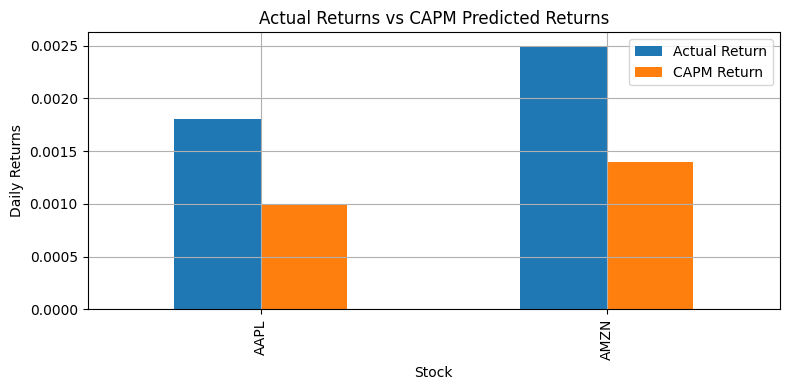

In [ ]:
#CAPM vs Actual Returns bar graph
results_df.set_index('Stock')[['Actual Return','CAPM Return']].plot(kind='bar',figsize=(8,4))
plt.title('Actual Returns vs CAPM Predicted Returns')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

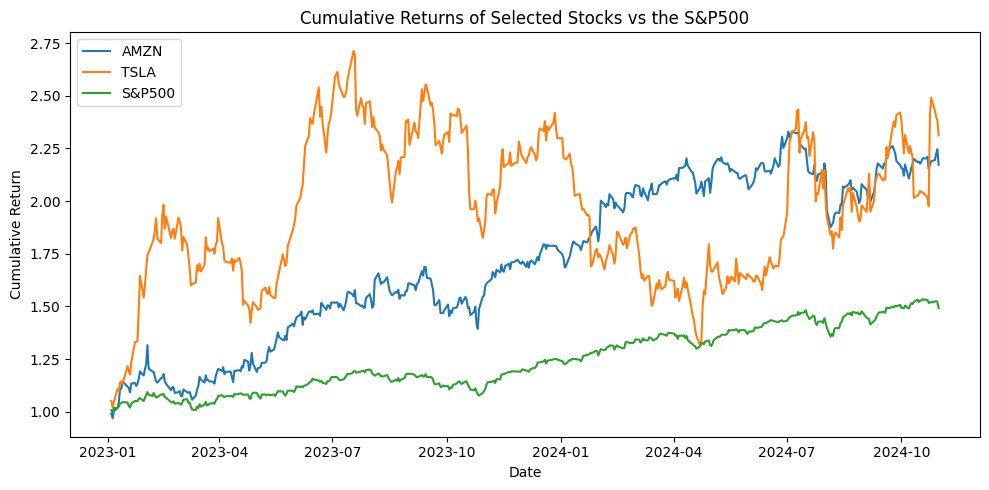

In [15]:
#Plotting cumulative returns for selected stocks against S&P500
cumulative_returns=(1+returns[tickers[:-1]]).cumprod()
cumulative_returns_sp500=(1+market_returns).cumprod()
plt.figure(figsize=(10,5))
for stock in tickers[:-1]:
  plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.plot(cumulative_returns_sp500.index,cumulative_returns_sp500,label='S&P500' )
plt.title('Cumulative Returns of Selected Stocks vs the S&P500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()
